# Sierpinski carpet
**Sierpinski carpet** is a fractal, which is an extension of **Cantor set**. The procedure of creating the Sierpinski carpet is expressed as:
1) We begin with a two-dimensional box (square). 
2) Next, we divide it into nine equal squares and then remove the middle one.
3) We repeat the above steps for each eight remaining squares.

**Hint:** You can extend the Python code here to create **Menger Sponge**
<br>by Hamed Shah-Hosseini, Twitter:@chekaad, Instagram:@ostad.ai
<br>https://github.com/ostad-ai/Generative-Art

In [1]:
# importing the required modules
import pygame as pg
from math import floor,ceil
from pycolors import css_colors
from matplotlib import pyplot as plt

pygame 2.4.0 (SDL 2.26.4, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# The size of the window, which you can change
WIDTH,HEIGHT=700,700

# The class that defines each 2d box or square with its center and size
class Box:
    def __init__(self,x=WIDTH//2,y=HEIGHT//2,size=min(WIDTH,HEIGHT)):
        self.x=x; self.y=y;self.size=size
        self.color=css_colors['green']
        self.left=floor(x-size/2)
        self.top=floor(y-size/2)
    def children(self):
        if self.size<=1:
            return [self]
        boxes=[]
        for i in range(-1,2):
            for j in range(-1,2):
                indicator=abs(i)+abs(j)
                if indicator>0:
                    newsize=ceil(self.size/3)
                    box=Box(self.x+i*newsize,self.y+j*newsize,newsize)
                    boxes.append(box)
        return boxes
    def render(self,surface):
        pg.draw.rect(surface,self.color,(self.left,self.top,self.size,self.size),0)

# This function goes into recursion for a number of times determined by parameter level
# Finally it returns the result image
def generateImage(level=3):
    pg.init()
    screen=pg.display.set_mode((WIDTH,HEIGHT),pg.HIDDEN)
    screen.fill(css_colors['beige'])
    boxes=[Box()]
    for i in range(level):
        boxes_=boxes.copy()
        boxes.clear()
        for box in boxes_:
            boxes.extend(box.children())
    for box in boxes:
        box.render(screen)
    image=pg.surfarray.array3d(screen).swapaxes(0,1)
    pg.quit()
    return image

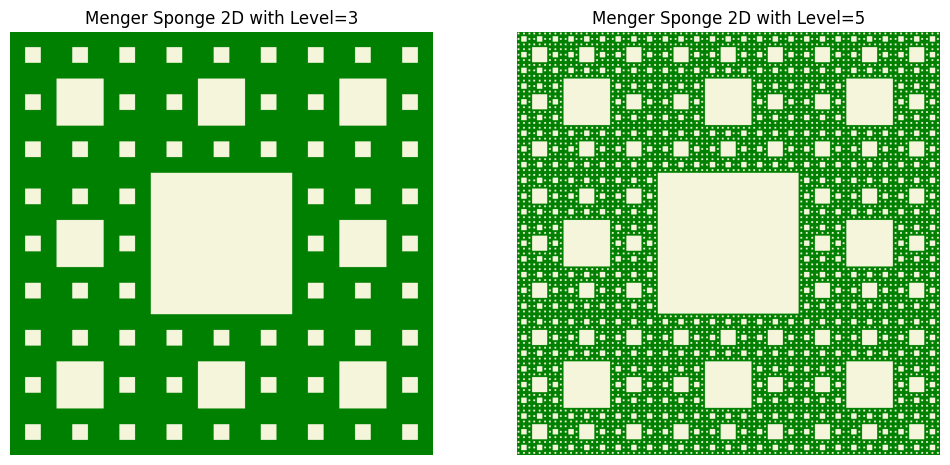

In [3]:
# Two examples of the Sierpinski carpet
level=3
image=generateImage(level)
plt.figure(figsize=(12,7))
plt.subplot(121);plt.imshow(image);plt.axis('off')
plt.title(f'Menger Sponge 2D with Level={level}')
level=5; image=generateImage(level)
plt.subplot(122);plt.imshow(image);plt.axis('off')
plt.title(f'Menger Sponge 2D with Level={level}')
plt.show()